## Task 4.10 Additional Graphs and Analysis Not Found in Part 1 Notebooks 

### -I created this notebook due to additional graphs and tables needed for the excel report. My computer will keep crashing to restart the larger past notebooks for this task since I have to close the notebook every day that I work on this assignment. A new notebook will save time allow me to continue. I check between each notebook to compare results and see if data is correct.

### The script contain the following points:

1A)Importing libraries to computer (Pandas, NumPy, OS, Matplotlib, Seaborn, and Scipy)

1B)Importing 'final_insta_data' dataset / Checking if data was imported properly

1C)Importing 'departments_wrangled' dataset / Checking if data was imported properly / Fixing table

2)Creating visualizations / Aggregating / Crosstabs / Value counts not completed in Part 1 notebooks



## 1A)Importing libraries to computer (Pandas, NumPy, OS, Matplotlib, Seaborn, and Scipy)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1B)Importing 'final_insta_data' dataset / Checking if data was imported properly

In [2]:
# Creating a data importing shortcut called 'path' for the Instacart folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/01-2023 Instacart Basket Analysis'

In [3]:
# Utilizing the created 'path' shortcut to import the 'cus_ords_prods' dataset 
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_insta_data.pkl'))

In [30]:
final_df.shape

(32404859, 35)

## 1C)Importing 'departments_wrangled' dataset / Checking if data was imported properly / Fixing table

In [4]:
# Importing departments_wrangled dataset to see what each department_id represents
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
# Renaming column Unnamed: 0 to department_id
df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [7]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 02. Creating visualizations / Aggregating / Crosstabs / Value counts not completed in Part 1 notebooks

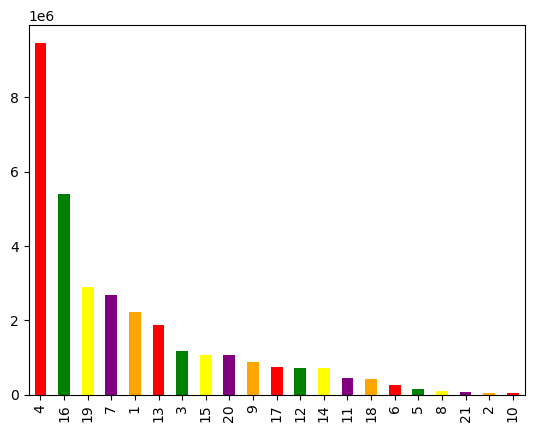

In [8]:
# Creates bar chart through matplotlib for 'department_id' column by  frequency 
dep_bar = final_df['department_id'].value_counts().plot.bar(color = ['red','green','yellow','purple','orange'])
plt.savefig('dep_bar5.png', bbox_inches='tight')

In [9]:
# Shows counts of values for each department_id
final_df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [10]:
# Shows counts of values for the price_range_loc variables
final_df['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [11]:
# aggregating min, max, mean of prices thats grouped by the price_range_loc
final_df.groupby('price_range_loc').agg({'prices': ['mean', 'min', 'max']})

prices            
                         mean   min   max
price_range_loc                          
High-range product  20.609746  15.1  25.0
Low-range product    3.023270   1.0   5.0
Mid-range product    9.757574   5.1  15.0

In [12]:
#Finds counts of users between the different loyal_flag variables based on spending_flag
loyal_spending = pd.crosstab(final_df['loyalty_flag'], final_df['spending_flag'], dropna = False)

In [13]:
loyal_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114799,6129191
Regular customer,302814,15573962


In [15]:
#Finds counts of users between the different age variables based on spending_flag
age_spending = pd.crosstab(final_df['age_flag'], final_df['spending_flag'], dropna = False)

In [16]:
age_spending

spending_flag,High spender,Low spender
age_flag,,
Adult,141089,7450102
Middle age,259027,12406556
Senior,163987,8411097
Young adult,70110,3502891


In [17]:
# aggregating min, max, mean of prices thats grouped by the age_flag
final_df.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Adult        7.783376  1.0  25.0
Middle age   7.791837  1.0  25.0
Senior       7.796546  1.0  25.0
Young adult  7.790869  1.0  25.0

In [18]:
#Finds counts of users with dependants or not based on spending_flag
fam_spending = pd.crosstab(final_df['num_of_dependants'], final_df['spending_flag'], dropna = False)

In [19]:
fam_spending

spending_flag,High spender,Low spender
num_of_dependants,,
0,153525,7943978
1,151060,7930044
2,168553,7922590
3,161075,7974034


In [20]:
# aggregating min, max, mean of prices thats grouped by num_of_dependants
final_df.groupby('num_of_dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
num_of_dependants                     
0                  7.789975  1.0  25.0
1                  7.795927  1.0  25.0
2                  7.784436  1.0  25.0
3                  7.793631  1.0  25.0

In [21]:
# aggregating min, max, mean of prices thats grouped by region
final_df.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
South      7.794918  1.0  25.0
West       7.790355  1.0  25.0

In [22]:
# Shows counts of values for each day of week
final_df['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [23]:
# Shows counts of values for each hour of day
final_df['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [24]:
# Shows counts of values for each age group
final_df['age_flag'].value_counts(dropna = False)

Middle age     12665583
Senior          8575084
Adult           7591191
Young adult     3573001
Name: age_flag, dtype: int64

In [25]:
# Shows counts of values for each income group
final_df['income_flag'].value_counts(dropna = False)

Middle class          15246357
Upper-middle class    12811528
Lower-middle class     3764233
Low class               523753
Wealthy class            58988
Name: income_flag, dtype: int64

In [26]:
# Shows counts of values for each pet_owner_flag group
final_df['pet_owner_flag'].value_counts(dropna = False)

Family w/out pet    24234223
Single w/out pet     8072920
Family w/ pet          73133
Single w/ pet          24583
Name: pet_owner_flag, dtype: int64

In [27]:
# aggregating min, max, mean of prices thats grouped by pet_owner_flag
final_df.groupby('pet_owner_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
pet_owner_flag                       
Family w/ pet     7.865436  1.0  15.0
Family w/out pet  7.791110  1.0  25.0
Single w/ pet     7.959383  1.0  15.0
Single w/out pet  7.789459  1.0  25.0

In [28]:
#Finds counts of users between the different pet_owner_flag variables based on spending_flag
pet_flag_spending = pd.crosstab(final_df['pet_owner_flag'], final_df['spending_flag'], dropna = False)

In [29]:
pet_flag_spending

spending_flag,High spender,Low spender
pet_owner_flag,,
Family w/ pet,2679,70454
Family w/out pet,478009,23756214
Single w/ pet,1415,23168
Single w/out pet,152110,7920810
